# AI For Healthcare
# Exercise 1: CT Reconstruction

## Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, iradon, iradon_sart, rescale
import time

## Step 1:
* Create a head phantom or use the Shepp-Logan head phantom. The bright ellipse corresponds to the skull and the structures inside correspond to the various brain tissues and lesions.  
* Calculate the synthetic projection using radon transform (parallel beam geometry) for the head phantom and the geometric images and explain your results.

In [3]:
# get image 
image = shepp_logan_phantom()

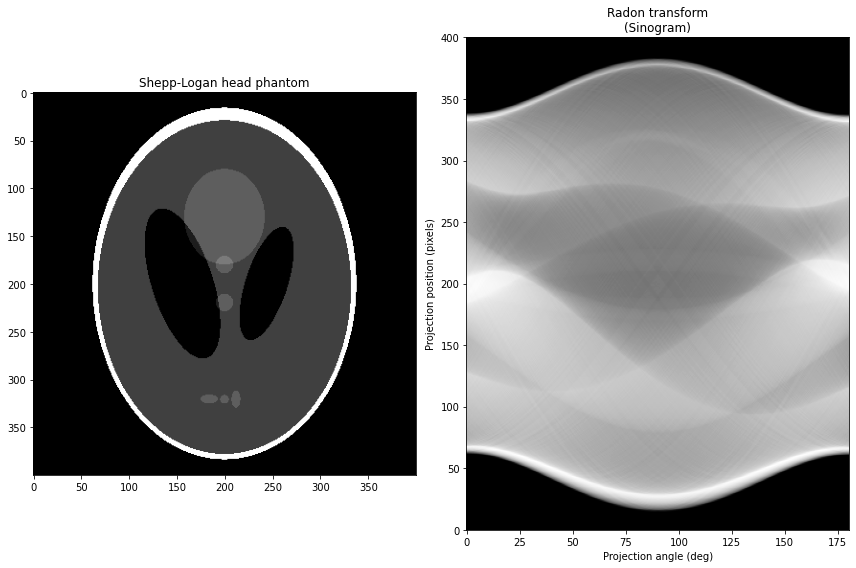

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Generate a plot for the original
ax1.set_title("Shepp-Logan head phantom")
ax1.imshow(image, cmap=plt.cm.Greys_r)

# Generate the sinogram
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

## Step 2: 
* Vary the number of projection angles (18,24,90,... ) and perform a reconstruction for each angle increment. 
* Explain the effect of varying the angles.

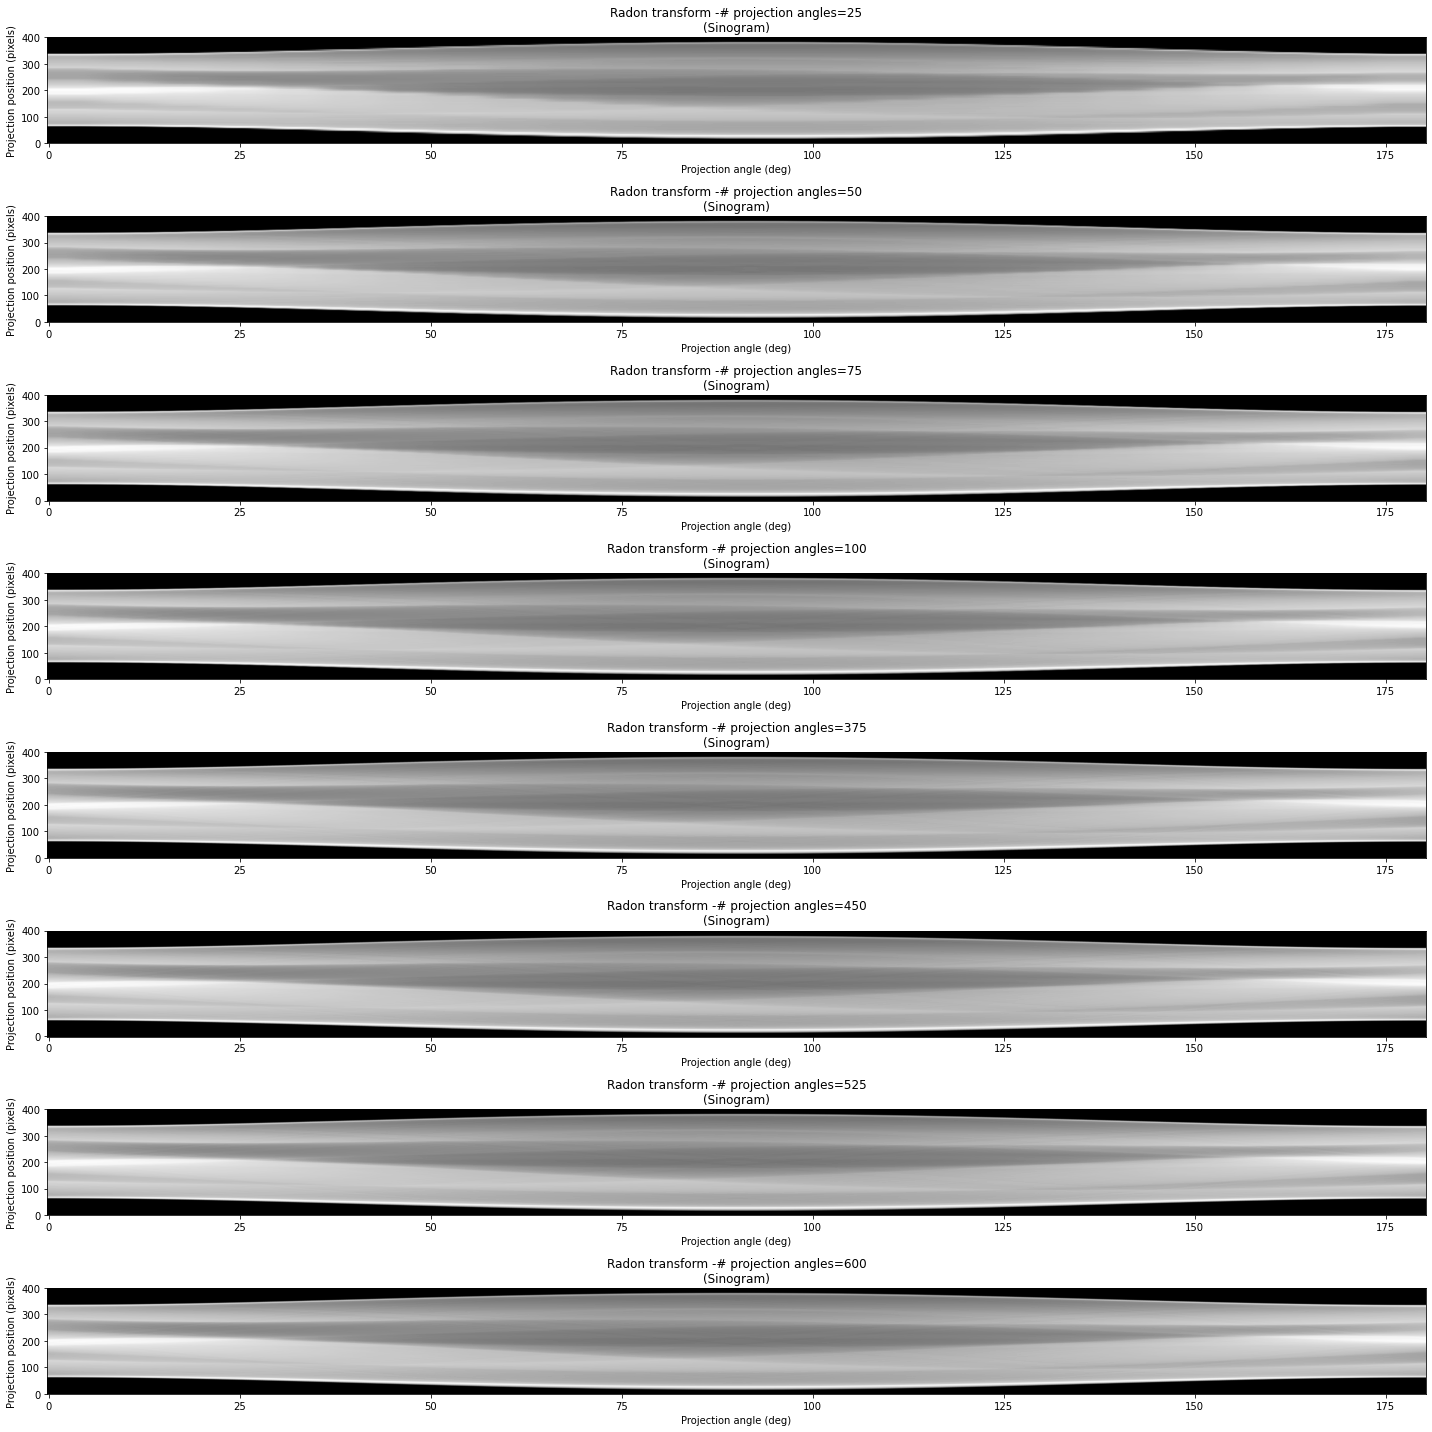

In [5]:
fig, ax = plt.subplots(8, 1, figsize=(20, 20))
time_list = [] 
amount_of_projection_angles_list = []
for figure_idx in range(0,8):
    # define amount_of_projection_angles
    if figure_idx<4:
        amount_of_projection_angles =  int(0.5*(figure_idx+1)*(max(image.shape)//ax.shape[0]))
    else:
        amount_of_projection_angles =  int(1.5*(figure_idx+1)*(max(image.shape)//ax.shape[0]))
    amount_of_projection_angles_list.append(amount_of_projection_angles)
    
    # create the sinogram (document how long it took)
    theta = np.linspace(0., 180., amount_of_projection_angles, endpoint=False)
    t1 = time.time()
    sinogram = radon(image, theta=theta)
    radon_time  =  np.round(time.time()-t1,2)
    time_list.append(radon_time)
    
    # create the plot
    dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
    plt.imshow(sinogram, cmap=plt.cm.Greys_r,
                extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                aspect='auto')
    ax[figure_idx].set_title("Radon transform -# projection angles="+str(amount_of_projection_angles)+"\n(Sinogram)")
    ax[figure_idx].set_xlabel("Projection angle (deg)")
    ax[figure_idx].set_ylabel("Projection position (pixels)")
    ax[figure_idx].imshow(sinogram, cmap=plt.cm.Greys_r,
                extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
                aspect='auto')

fig.tight_layout()
plt.show()



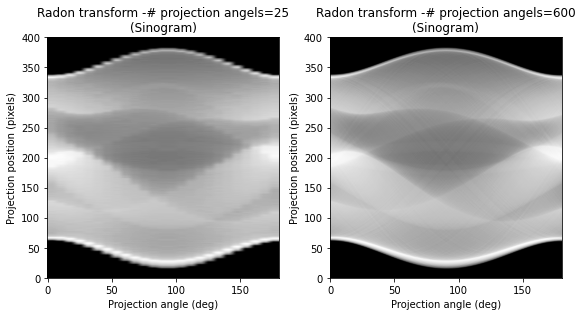

In [8]:

theta_600 = np.linspace(0., 180., 600, endpoint=False)
theta_25 = np.linspace(0., 180., 25, endpoint=False)
sinogram_600 = radon(image, theta=theta_600)
sinogram_25 = radon(image, theta=theta_25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram_25.shape[0]
ax1.set_title("Radon transform -# projection angels="+str(25)+"\n(Sinogram)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(sinogram_25, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram_600.shape[0]

ax2.set_title("Radon transform -# projection angels="+str(600)+"\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram_600, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram_600.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

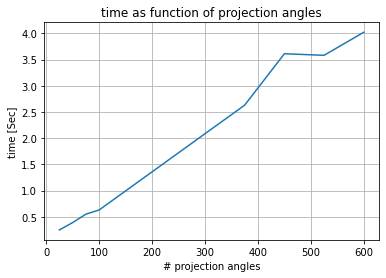

In [7]:
# Discuess change in run time according to number of projection angles
plt.figure()
plt.plot(amount_of_projection_angles_list, time_list)
plt.xlabel('# projection angles')
plt.ylabel('time [Sec]')
plt.grid()
plt.title('time as function of projection angles')
plt.show()

## Step 3: 
* Demonstrate the difference of performing back projection and filtered back projection. 

In [19]:
# Generate the sinogram
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

In [20]:
# Generate the reconstructions
reconstruction_fbp_no_filter = iradon(sinogram, theta=theta, filter_name=None)
reconstruction_fbp_with_filter = iradon(sinogram, theta=theta, filter_name='ramp')

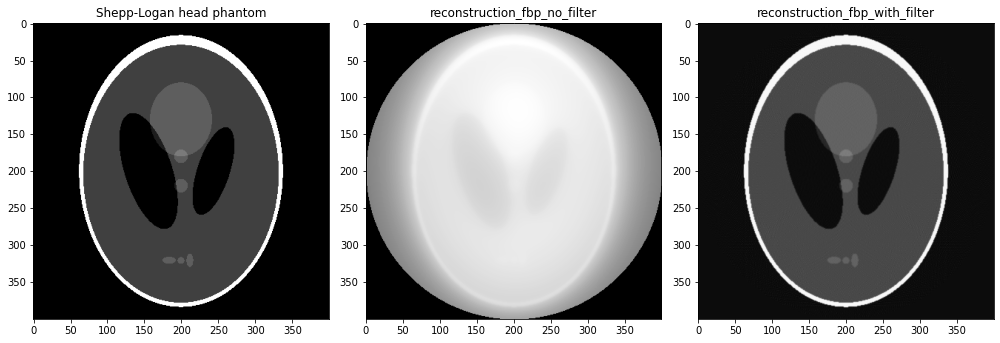

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 14))

# Generate a plot for the original
ax1.set_title("Shepp-Logan head phantom")
ax1.imshow(image, cmap=plt.cm.Greys_r)

# Generate the sinogram
ax2.set_title("reconstruction_fbp_no_filter")
ax2.imshow(reconstruction_fbp_no_filter, cmap=plt.cm.Greys_r)

ax3.set_title("reconstruction_fbp_with_filter")
ax3.imshow(reconstruction_fbp_with_filter, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

## Step 4: 
* Apply & describe an algebraic  iterative reconstruction technique such as SIRT/ CGLS/ another. 

https://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html

In [5]:
# from skimage.transform import iradon_sart

# reconstruction_sart = iradon_sart(sinogram, theta=theta)
# error = reconstruction_sart - image
# print(f'SART (1 iteration) rms reconstruction error: '
#       f'{np.sqrt(np.mean(error**2)):.3g}')

# fig, axes = plt.subplots(2, 2, figsize=(8, 8.5), sharex=True, sharey=True)
# ax = axes.ravel()

# ax[0].set_title("Reconstruction\nSART")
# ax[0].imshow(reconstruction_sart, cmap=plt.cm.Greys_r)

# ax[1].set_title("Reconstruction error\nSART")
# ax[1].imshow(reconstruction_sart - image, cmap=plt.cm.Greys_r, **imkwargs)

# # Run a second iteration of SART by supplying the reconstruction
# # from the first iteration as an initial estimate
# reconstruction_sart2 = iradon_sart(sinogram, theta=theta,
#                                    image=reconstruction_sart)
# error = reconstruction_sart2 - image
# print(f'SART (2 iterations) rms reconstruction error: '
#       f'{np.sqrt(np.mean(error**2)):.3g}')

# ax[2].set_title("Reconstruction\nSART, 2 iterations")
# ax[2].imshow(reconstruction_sart2, cmap=plt.cm.Greys_r)

# ax[3].set_title("Reconstruction error\nSART, 2 iterations")
# ax[3].imshow(reconstruction_sart2 - image, cmap=plt.cm.Greys_r, **imkwargs)
# plt.show()

In [6]:
# Generate the sinogram
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
original_sinogram = radon(image, theta=theta)

In [7]:
# Define starting image
reconstruced_image_init = np.zeros_like(image)

In [ ]:
# verify black image
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 8))
ax1.set_title("Start")
ax1.imshow(reconstruced_image_init, cmap=plt.cm.Greys_r)
fig.tight_layout()
plt.show()

In [28]:
reconstruced_image = reconstruced_image_init
num_of_iterations = 7
for i in range(num_of_iterations):
    # Forward Projection: calculate current sinogram
    curr_sinogram = radon(reconstruced_image, theta=theta)
    
    #  Perform Weighted projection difference 
    ##### weighted ???
    updated_sinogram = original_sinogram - curr_sinogram

    # Perform Weighted backprojection
    ##### weighted ???
    # reconstruction_fbp = iradon(updated_sinogram, theta=theta, filter_name=None)
    # reconstruction_fbp = iradon_sart(updated_sinogram, theta=theta)
    # # Run a second iteration of SART by supplying the reconstruction
    # # from the first iteration as an initial estimate
    reconstruction_fbp = iradon_sart(sinogram, theta=theta, image=reconstruced_image)
                                   
    # finally, update the reconstructed image
    reconstruced_image = reconstruction_fbp
    
    # print error
    error = reconstruced_image - image
    print(f'iteration {i}, reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

iteration 0, reconstruction error: 0.0368
iteration 1, reconstruction error: 0.0306
iteration 2, reconstruction error: 0.0278
iteration 3, reconstruction error: 0.0262
iteration 4, reconstruction error: 0.0252
iteration 5, reconstruction error: 0.0245
iteration 6, reconstruction error: 0.024


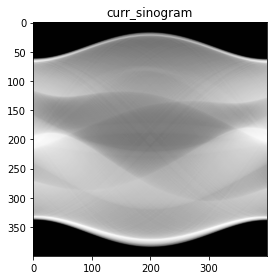

In [29]:
# plot it
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
ax1.set_title("curr_sinogram")
ax1.imshow(curr_sinogram, cmap=plt.cm.Greys_r)
fig.tight_layout()
plt.show()

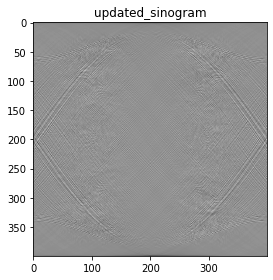

In [30]:
# plot it
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
ax1.set_title("updated_sinogram")
ax1.imshow(updated_sinogram, cmap=plt.cm.Greys_r)
fig.tight_layout()
plt.show()

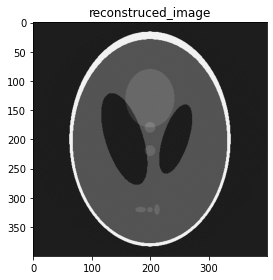

In [31]:
# plot it
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
ax1.set_title("reconstruced_image")
ax1.imshow(reconstruced_image, cmap=plt.cm.Greys_r)
fig.tight_layout()
plt.show()